# 数据包络分析

**DEA的目的：** 为某一系统选取合适的指标；某一系统内的关键指标有哪些；做出评价，获得某一系统的效益得分

**评价的方式、特点：** 
1. 将数据划分为【投入项】和【产出项】。
2. 不预先设定权重值，从最有利于【决策单元】的角度进行评价。
3. 通过【DEA】的方法获得最优权重，同时获得每个【决策单元】的【效率】。

**概念深入理解：** 
1. 【决策单元】：在DEA中，每个被评估的对象称为“决策单元”，每个决策单元都有 $m_1$ 种投入和 $m_2$ 种产出。

    第 $i$ 个决策单元的第 $j$ 项投入用 $x_{i j}\left(i=1,2, \cdots, n ; j=1,2, \cdots, m_1\right)$ 表示，第 $i$ 个决策单元的第 $j$ 项产出用 $y_{i j}\left(i=1,2, \cdots, n ; j=1,2, \cdots, m_2\right)$ 表示，
    
    投入、产出的权重分别用 $u=\left(u_1, u_2, \cdots, u_{m_1}\right) 、 v=\left(v_1, v_2, \cdots, v_{m_2}\right)$ 表示。
2. 【DEA】：适用于对【多投入多产出问题】进行评价。利用线性规划，获得【最优】权重，再以最优权重下的投入与产出作为【生产前沿面】，构建数据包络曲线。

    其中，有效点（决策单元）会位于前沿面上，效率值标定为 1；无效点则会位于前沿面外， 并被赋予一个大于 0 小于 1 的相对效率值指标
3. 【最优】：【效率评价指数(≤1)】达到最大时称为最优。该情况下的权重称为最优权重，对应达到最优的决策单元称为“DEA有效”，反之称为“非DEA有效”。
4. 【(相对)效率】：通俗地讲，效率就是提供一定的投入之后，对产出能不能达到预期要求的一种评价方式。

    显然效率主要与投入和产出指标有关，因此很自然地，我们定义 **效率 = (加权)投入产出比**
5. 【生产前沿面】：对于一个决策单元，投入和产出都有对应的值，对应一个投入产出的集合；这个集的边界的意思就是：固定现有的投入获得最大的产出，或是固定现有的产出下最小投入。那么称这样一个边界面称为生产前沿面。
6. CCR模式下的决策单元 $k$ 的【效益评价指数】：$$E_k=\frac{u^T X_k}{v^T Y_k}=\frac{\sum_{i=1}^{m_1} u_i x_{i k}}{\sum_{i=1}^{m_2} v_i y_{i k}} \quad k=1,2, \cdots, n$$

### 简单的小例子（理解）
背景：一个工厂生产产品，则投入指标为土地和工人，另有一个产出指标固定为1。（这种情况下应该看投入产出比，越小越好）
\begin{array}{|l|l|l|l|l|l|}
\hline \text { 工厂 } & \mathrm{A} & \mathrm{B} & \mathrm{C} & \mathrm{D} & \mathrm{E} \\
\hline \text { 工人 } & 4 & 7 & 8 & 4 & 2 \\
\hline \text { 土地 } & 3 & 3 & 1 & 2 & 4 \\
\hline \text { 产出 } & 1 & 1 & 1 & 1 & 1 \\
\hline
\end{array}
假设最优权重都是1，那么投入产出比可以表示为(4,3) (7,3) (8,1) (4,2) (2,4)，画图如下：

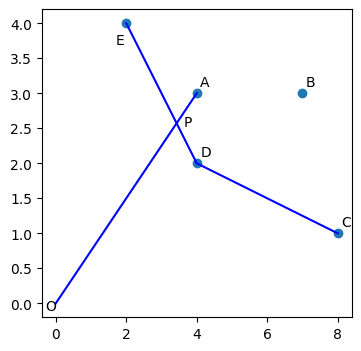

In [36]:
# 只是画个图，代码无关
import numpy as np
import matplotlib.pyplot as plt 
x = [4, 7, 8, 4, 2]
y = [3, 3, 1, 2, 4]
plt.figure(figsize=(4, 4))
plt.scatter(x,y)
plt.annotate('A', xy=(4,3), xytext=(4.1,3.1)) 
plt.annotate('B', xy=(7,3), xytext=(7.1,3.1)) 
plt.annotate('C', xy=(8,1), xytext=(8.1,1.1)) 
plt.annotate('D', xy=(4,2), xytext=(4.1,2.1)) 
plt.annotate('E', xy=(2,4), xytext=(1.7,3.7)) 
plt.annotate('O', xy=(0,0), xytext=(-0.3,-0.1)) 
plt.annotate('P', xy=(24/7,17/7), xytext=(24/7+0.2,17/7+0.1)) 
fa = lambda x: 3/4*x
xa = np.linspace(0,4,100)
ya = fa(xa)
plt.plot(xa, ya, 'b')
fed = lambda x: -1*x+6
xed = np.linspace(2,4,100)
yed = fed(xed)
plt.plot(xed, yed,'b')
fdc = lambda x: -1/4*x+3
xdc = np.linspace(4,8,100)
ydc = fdc(xdc)
plt.plot(xdc, ydc,'b')

如上图，EDC构成的面即为生产前沿面。EDC点处的效率值为1，A点的距离d=OA/OP，因为效率值是≤1的，所以效率E=OP/OA。

因此，从投入产出比出发，效率等于距离的倒数，而从产出投入比角度出发，效率则等于距离。

## DEA 效率评估模型
1. CCR模型
2. BCC模型

### CCR模型
“投入导向模式”：从投入资源的角度来看，固定当前产出的情况下，比较投入资源的使用情况，用投入产出比作为效益评价的依据。

最终得到的是综合技术效益（OE)

CCR模型如下：
$$
\begin{gathered}
\text { s.t. } \begin{cases}\min OE_{k}=\frac{\sum_{j=1}^{m_2} u_j y_{k j}}{\sum_{j=1}^{m_1} v_j x_{k j}} \\
\frac{\sum_{j=1}^{m_2} u_j y_{i j}}{\sum_{j=1}^{m_1} v_j x_{i j}} \leq 1, i=1,2, \ldots n \\
u \geq 0, v \geq 0\end{cases}
\end{gathered}
$$
但这种模型不是传统的线性规划模型，难以求最优解。因此将其线性化后，取对偶模型 (...), 转为如下模型（评价 决策单元 $k$ 效益的 CCR 模式线性规划模型）:
$$
\begin{array}{ll}
\min \quad OE_k \\
\text { s.t } \begin{cases}\sum_{i=1}^n \lambda_i x_{i j} \leq OE_k \cdot x_{k j} & \forall j=1,2, \cdots, m_1 \\
\sum_{i=1}^n \lambda_i y_{i j} \geq y_{k j} & \forall j=1,2, \cdots, m_2 \\
\lambda_i \geq 0, i=1,2, \cdots, n\end{cases}
\end{array}
$$

> 这个模型可以直观地理解为，将决策单元 $k$ 的投入、产出表示为其他决策单元的线性组合。

> 如果有某个 (或某些) 决策单元的产出量达到决策单元 $k$ 的水平 (第二个约束的含义)，而投入量尽可能小 (第一个约束的含义)，还出现 $OE_k<1$ 的情况，这说明该决策单元存在资源浪费。

> 如果该决策单元的效率已经是最高的了, 那么任何的决策单元都不能使用比它还要少的投入获得同样 (甚至更多) 的产出. 这时候 $OE_k=1$

**加速模型求解及分析产能效应：**，为上述方程引入松他变量 $s_i^{-}, s_j^{+}$，引入非阿基米德数 $\varepsilon$ (通常设为 $10^{-6}$ )。

其中 $s_j^{-}$ 称为差额变数，表示该决策单元为达到“DEA 有效”应减少的投入量， $s_k^{+}$称为超额变数，代表为达到“DEA 有效”应增加的产出量。

CCR 模式线性规划模型化为:
$$
\begin{array}{ll}
\min \quad OE_k-\varepsilon\left(\sum_{i=1}^{m_1} s_i^{-}+\sum_{j=1}^{m_2} s_j^{+}\right) \\
s . t \begin{cases}\sum_{i=1}^n \lambda_i x_{i j}+s_j^{-}=O E_k \cdot x_{k j} & \forall j=1,2, \cdots, m_1 \\
\sum_{i=1}^n \lambda_i y_{i j}-s_j^{+}=y_{k j} & \forall j=1,2, \cdots, m_2 \\
\lambda_i \geq 0, i=1,2, \cdots, n & \\
s_i^{-}, s_j^{+} \geq 0 & \\
\varepsilon \rightarrow 0 & \end{cases}
\end{array}
$$

尽管 $\varepsilon$ 很小，但我们无法得知各 $s_i^{-}, s_j^{+}$的大小数量级，直接进行计算可能会产生误差，因此求解该问题使用【分层序列法】。

**【分层序列法】：** 设多目标决策给出的重要性序列为: $f_1(x),f_2(x),\dots,f_m(x)$ ，首先对第一个目标求最优解, 并找出所有最优解的集合记为 $R_1$ , 然后在 $R_1$ 内求第二个目标的最优解, 记这时的最优解集合为 $R_2$ , 如此一直到求出第 $m$ 个目标的最优解 

在这里，第一阶段求解 $O E_k$ 的最小值，第二阶段在 $O E_k$ 已知下求 $\sum_{i=1}^{m_1} s_i^{-}+\sum_{j=1}^{m_2} s_j^{+}$的最大值，即：
$$
\begin{array}{llr}
\operatorname{Obj}_1: \min O E_k \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad \mathrm{Obj}_2: \max \sum_{i=1}^{m_1} s_i^{-}+\sum \\
s . t\left\{\begin{array} { l l } 
{ \sum _ { i = 1 } ^ { n } \lambda _ { i } x _ { i j } \leq O E _ { k } \cdot x _ { k j } } & { \forall j = 1 , 2 , \cdots , m _ { 1 } } \\
{ \sum _ { i = 1 } ^ { n } \lambda _ { i } y _ { i j } \geq y _ { k j } } & { \forall j = 1 , 2 , \cdots , m _ { 2 }} \\
{ \lambda _ { i } \geq 0 , i = 1 , 2 , \cdots , n }
\end{array} \quad s . t\left\{\begin{array}{l}
\sum_{i=1}^n \lambda_i x_{i j}+s_j^{-}=O E \\
\sum_{i=1}^n \lambda_i y_{i j}-s_j^{+}=y_{k j} \\
\lambda_i \geq 0, i=1,2, \cdots, n \\
s_i^{-}, s_j^{+} \geq 0
\end{array}\right.\right.
\end{array}
$$

### BCC模式
“投入导向模式”：从产出的角度探讨效率，即在相同的投入情况下，比较产出资源的达成情况。

得到的是“技术效益”，DEA = 1 称为 “技术有效”。

### DEA模型结果分析
1. 效益分析
    - 综合技术效益(overall efficiency, OE)反映的是决策单元在一定(最优规模时) 投入要素的生产效率，
    是对决策单元的资源配置能力、资源使用效率等多方面能力的综合衡量与评价(?)
    - 技术效益(technical efficiency, TE)是企业由于管理和技术等因素影响的生产效率(?)
    - 规模效益(scale efficiency, SE)是由于企业规模因素影响的生产效率(?)
    这三个效益满足关系式子：$$OE=TE*SE$$
    
    > 综合技术效益 = 1，表示该决策单元的投入产出是综合有效的，即同时技术有效和规模有效。技术效益 = 1，规模效益 < 1，表示在目前的技术水平上，其投入资源的使用是有效率的，未能达到综合有效的根本原因在于其规模无效，因此其改革的重点在于如何更好地发挥其规模效益 
2. 有效性分析
    
    CCR 模式下 DEA 效率评估模型所得到的最优解 $O E_k$ 是决策单元 $k$ 的 “综合技术效益" 。根据 $O E_k$ 取值不同， 将综合效益评估分为以下三种情况:

    - 若 $O E_k=1, s_i^{-}, s_j^{+}=0 \forall i, j$ ，说明决策单元是 “DEA 强有效" 的，即任何一项投入的 数量都无法减少，除非减少产出或增加另外一种投入的数量；任何一种产出的数量都无法增加， 除非增加投入的数量或减少另外一种产出的数量。即：同时达到技术有效和规模有效
    - 若 $O E_k=1$, 某一 $s_i^{-}$或 $s_j^{+}$为 0 ，说明决策单元是 “DEA 弱有效" 的，无法等比例减少各项 投入的数量，除非减少产出的数量；无法等比例增加各项产出的数量，除非增加投入的数量。 即：技术有效和规模有效只满足一个
    - 若 $O E_k<1$ ，说明决策单元是 “非 DEA 有效" 的，存在资源浪费现象（没有合理利用资 源），既不是效率最佳也不是规模最佳

    对 "DEA 弱有效" 的决策按照 $s_i^{-}, s_j^{+}$的冗余情况进行调整，使之变得 "DEA 强有效" 。
3. 规模报酬分析(?)

    在不同的生产规模下，规模报酬将会随之改变。
    
    生产规模小时，投入产出比会随着规模增加而迅速提升，称为规模报酬递增(Increasing Returns to Scale, IRS)；
    
    当生产达到高峰期时，产出与规模成正比而达到最适生产规模，称为规模报酬固定；
    
    当生产规模过于庞大时，产出减缓，则称为规模报酬递减(Decreasing Returns to Scale, DRS)，也就是投入增加时，产出增加的比例会少于投入增加的比例。

In [37]:
import gurobipy
import pandas as pd

# 分页显示数据, 设置为 False 不允许分页
pd.set_option('display.expand_frame_repr', False)

# 最多显示的列数, 设置为 None 显示全部列
pd.set_option('display.max_columns', None)

# 最多显示的行数, 设置为 None 显示全部行
pd.set_option('display.max_rows', None)

class DEA(object):
	def __init__(self, DMUs_Name, X, Y, AP=False):
		self.m1, self.m1_name, self.m2, self.m2_name, self.AP = X.shape[1], X.columns.tolist(), Y.shape[1], Y.columns.tolist(), AP
		self.DMUs, self.X, self.Y = gurobipy.multidict({DMU: [X.loc[DMU].tolist(), Y.loc[DMU].tolist()] for DMU in DMUs_Name})
		print(f'DEA(AP={AP}) MODEL RUNING...')

	def __CCR(self):
		for k in self.DMUs:
			MODEL = gurobipy.Model()
			OE, lambdas, s_negitive, s_positive = MODEL.addVar(), MODEL.addVars(self.DMUs),  MODEL.addVars(self.m1), MODEL.addVars(self.m2)
			MODEL.update()
			MODEL.setObjectiveN(OE, index=0, priority=1)
			MODEL.setObjectiveN(-(sum(s_negitive) + sum(s_positive)), index=1, priority=0)
			MODEL.addConstrs(gurobipy.quicksum(lambdas[i] * self.X[i][j] for i in self.DMUs if i != k or not self.AP) + s_negitive[j] == OE * self.X[k][j] for j in range(self.m1))
			MODEL.addConstrs(gurobipy.quicksum(lambdas[i] * self.Y[i][j] for i in self.DMUs if i != k or not self.AP) - s_positive[j] == self.Y[k][j] for j in range(self.m2))
			MODEL.setParam('OutputFlag', 0)
			MODEL.optimize()
			self.Result.at[k, ('效益分析', '综合技术效益(CCR)')] = MODEL.objVal
			self.Result.at[k, ('规模报酬分析', '有效性')] = '非 DEA 有效' if MODEL.objVal < 1 else 'DEA 弱有效' if s_negitive.sum().getValue() + s_positive.sum().getValue() else 'DEA 强有效'
			self.Result.at[k, ('规模报酬分析', '类型')] = '规模报酬固定' if lambdas.sum().getValue() == 1 else '规模报酬递增' if lambdas.sum().getValue() < 1 else '规模报酬递减'
			for m in range(self.m1):
				self.Result.at[k, ('差额变数分析', f'{self.m1_name[m]}')] = s_negitive[m].X
				self.Result.at[k, ('投入冗余率',  f'{self.m1_name[m]}')] = 'N/A' if self.X[k][m] == 0 else s_negitive[m].X / self.X[k][m]
			for m in range(self.m2):
				self.Result.at[k, ('差额变数分析', f'{self.m2_name[m]}')] = s_positive[m].X
				self.Result.at[k, ('产出不足率', f'{self.m2_name[m]}')] = 'N/A' if self.Y[k][m] == 0 else s_positive[m].X / self.Y[k][m]
		return self.Result

	def __BCC(self):
		for k in self.DMUs:
			MODEL = gurobipy.Model()
			TE, lambdas = MODEL.addVar(), MODEL.addVars(self.DMUs)
			MODEL.update()
			MODEL.setObjective(TE, sense=gurobipy.GRB.MINIMIZE)
			MODEL.addConstrs(gurobipy.quicksum(lambdas[i] * self.X[i][j] for i in self.DMUs if i != k or not self.AP) <= TE * self.X[k][j] for j in range(self.m1))
			MODEL.addConstrs(gurobipy.quicksum(lambdas[i] * self.Y[i][j] for i in self.DMUs if i != k or not self.AP) >= self.Y[k][j] for j in range(self.m2))
			MODEL.addConstr(gurobipy.quicksum(lambdas[i] for i in self.DMUs if i != k or not self.AP) == 1)
			MODEL.setParam('OutputFlag', 0)
			MODEL.optimize()
			self.Result.at[k, ('效益分析', '技术效益(BCC)')] = MODEL.objVal if MODEL.status == gurobipy.GRB.Status.OPTIMAL else 'N/A'
		return self.Result

	def dea(self):
		columns_Page = ['效益分析'] * 3 + ['规模报酬分析'] * 2 + ['差额变数分析'] * (self.m1 + self.m2) + ['投入冗余率'] * self.m1 + ['产出不足率'] * self.m2
		columns_Group = ['技术效益(BCC)', '规模效益(CCR/BCC)', '综合技术效益(CCR)','有效性', '类型'] + (self.m1_name + self.m2_name) * 2
		self.Result = pd.DataFrame(index=self.DMUs, columns=[columns_Page, columns_Group])
		self.__CCR()
		self.__BCC()
		self.Result.loc[:, ('效益分析', '规模效益(CCR/BCC)')] = self.Result.loc[:, ('效益分析', '综合技术效益(CCR)')] / self.Result.loc[:,('效益分析', '技术效益(BCC)')]
		return self.Result

	def analysis(self, file_name=None):
		Result = self.dea()
		file_name = 'DEA 数据包络分析报告.xlsx' if file_name is None else f'\\{file_name}.xlsx'
		Result.to_excel(file_name, 'DEA 数据包络分析报告')

In [38]:
data = pd.DataFrame({1990: [14.40, 0.65, 31.30, 3621.00, 0.00], 1991: [16.90, 0.72, 32.20, 3943.00, 0.09],1992: [15.53, 0.72, 31.87, 4086.67, 0.07], 1993: [15.40, 0.76, 32.23, 4904.67, 0.13],
1994: [14.17, 0.76, 32.40, 6311.67, 0.37], 1995: [13.33, 0.69, 30.77, 8173.33, 0.59],
1996: [12.83, 0.61, 29.23, 10236.00, 0.51], 1997: [13.00, 0.63, 28.20, 12094.33, 0.44],
1998: [13.40, 0.75, 28.80, 13603.33, 0.58], 1999: [14.00, 0.84, 29.10, 14841.00, 1.00]},
index=['政府财政收入占 GDP 的比例/%', '环保投资占 GDP 的比例/%', '每千人科技人员数/人', '人均 GDP/元', '城市环境质量指数']).T

X = data[['政府财政收入占 GDP 的比例/%', '环保投资占 GDP 的比例/%', '每千人科技人员数/人']]
Y = data[['人均 GDP/元', '城市环境质量指数']]

dea = DEA(DMUs_Name=data.index, X=X, Y=Y)
dea.analysis()	# dea 分析并输出表格
print(dea.dea()) # dea 分析，不输出结果

DEA(AP=False) MODEL RUNING...
Restricted license - for non-production use only - expires 2024-10-28


ModuleNotFoundError: No module named 'openpyxl'